**INTRODUCTION**

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles


**IMPORT MODULES AND LIBRARIES FOR DATA ANALYSIS**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, ranking, confusion_matrix, accuracy_score, roc_curve
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import pandas_profiling


**IMPORT DATA**

In [2]:
vec = pd.read_csv('vehicle.csv')


In [3]:
#VIEW DATA 
vec.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#CONDUCT A QUICK REVIEW OF DATA TYPES, QUANTITY OF MISSING AND NON-MISSING VALUES
vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**Observations**

The data has 19 variables and 846 observations. Except for columns compactness, max.length_aspect_ratio, max.length_rectangularity, hollows_ratio and class with complete number of observations, all other features have missing or null values

The 'CLASS' variable represents the classification variable for the data set and will be dropped for unsupervised classification of the data

In [5]:
vec.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

**Observations**

Most of the data have skewed distributions except for a few. The direction of skew will be viewed later in this analysis.

In [6]:
vec.profile_report(title='vehicle clasification report')

In [7]:
vec.groupby('class').count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [8]:
vecFeats = vec

In [9]:
vecFeats.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [10]:
#we inspect the data for missing values

vecFeats.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

**Observations**

From the values above, we have some missing values which we shall look at the relationship with other data set to know how best to deal with the missing values

In [11]:
#dealing with missing data

#Because the number of missing values are few, 
#I propose to use the mean of the attriutes distribution rto replace the missing values

vecFeats = vecFeats.fillna(vecFeats.mean())
vecFeats.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

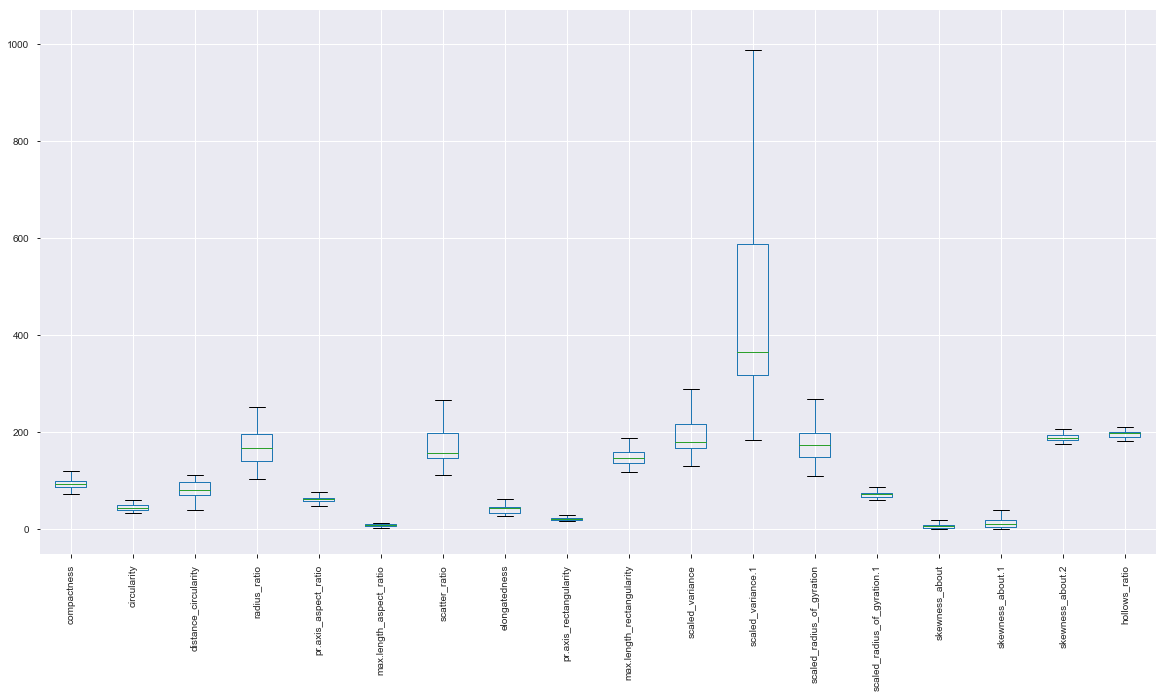

In [12]:
#We shall conduct a univate analysis to check the individual features statistical distribution and check for outliers

vecFeats.boxplot(figsize=(20, 10), rot=90)

**Observation**

scaled_radius_of_gyration.1, pr.axis_aspect_ratio, max.length_aspect_ratio and radius_ratio seems to have outliers (that is values that are above the 3rd quartile values by 1.5 times the interquartile range. This may bias the models being generated. 

**ESTIMATING THE INTERQUANTILE RANGE**

In [13]:
Q1 = vecFeats.quantile(0.25) #First quantile values
Q3 = vecFeats.quantile(0.75) #Thrd quantile values

IQR = Q3 - Q1

print(IQR)



compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


** DEALING WITH OUTLIERS**

Outliers are defined as values that fall in the range Q1 - 1.5*IQR OR Q3 + 1.5*IQR

In [14]:
vecFeats = vecFeats[-((vecFeats < (Q1 - 1.5*IQR)) | (vecFeats > (Q3 + 1.5*IQR))).any(axis=1)]

print(vecFeats.shape)

(323, 19)


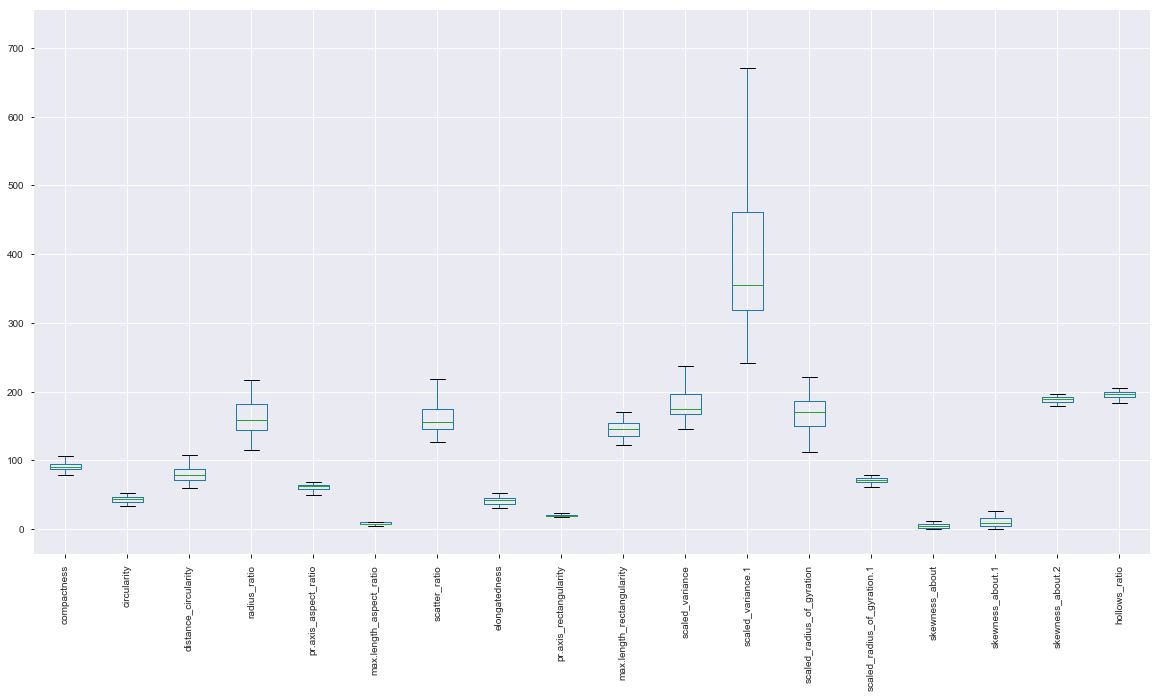

In [15]:
vecFeats.boxplot(figsize=(20, 10), rot=90)

**OBSERVATION**

After the removal of outliers, the plot above shows the cleaned attribute of the dataset 

In [16]:
vecFeats_corr = vecFeats.corr()

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(vecFeats_corr[(vecFeats_corr>=0.7) | (vecFeats_corr<=-0.7)], annot=True, vmax=1, 
            cmap='GnBu',linecolor="white", linewidths=0.1)

**Observations**

The plot shows very strong correlation between the different features being analysed. This will require that some of the features be dropped with expert advise.

In [18]:
#For feature analysis, the column 'Class' will be dropped
vecFeats = vec.drop('class', axis=1) #first batch of features
target = vec['class']

In [19]:
vecFeats.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [20]:
vecFeats = vecFeats.fillna(vecFeats.mean())

vecFeats.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

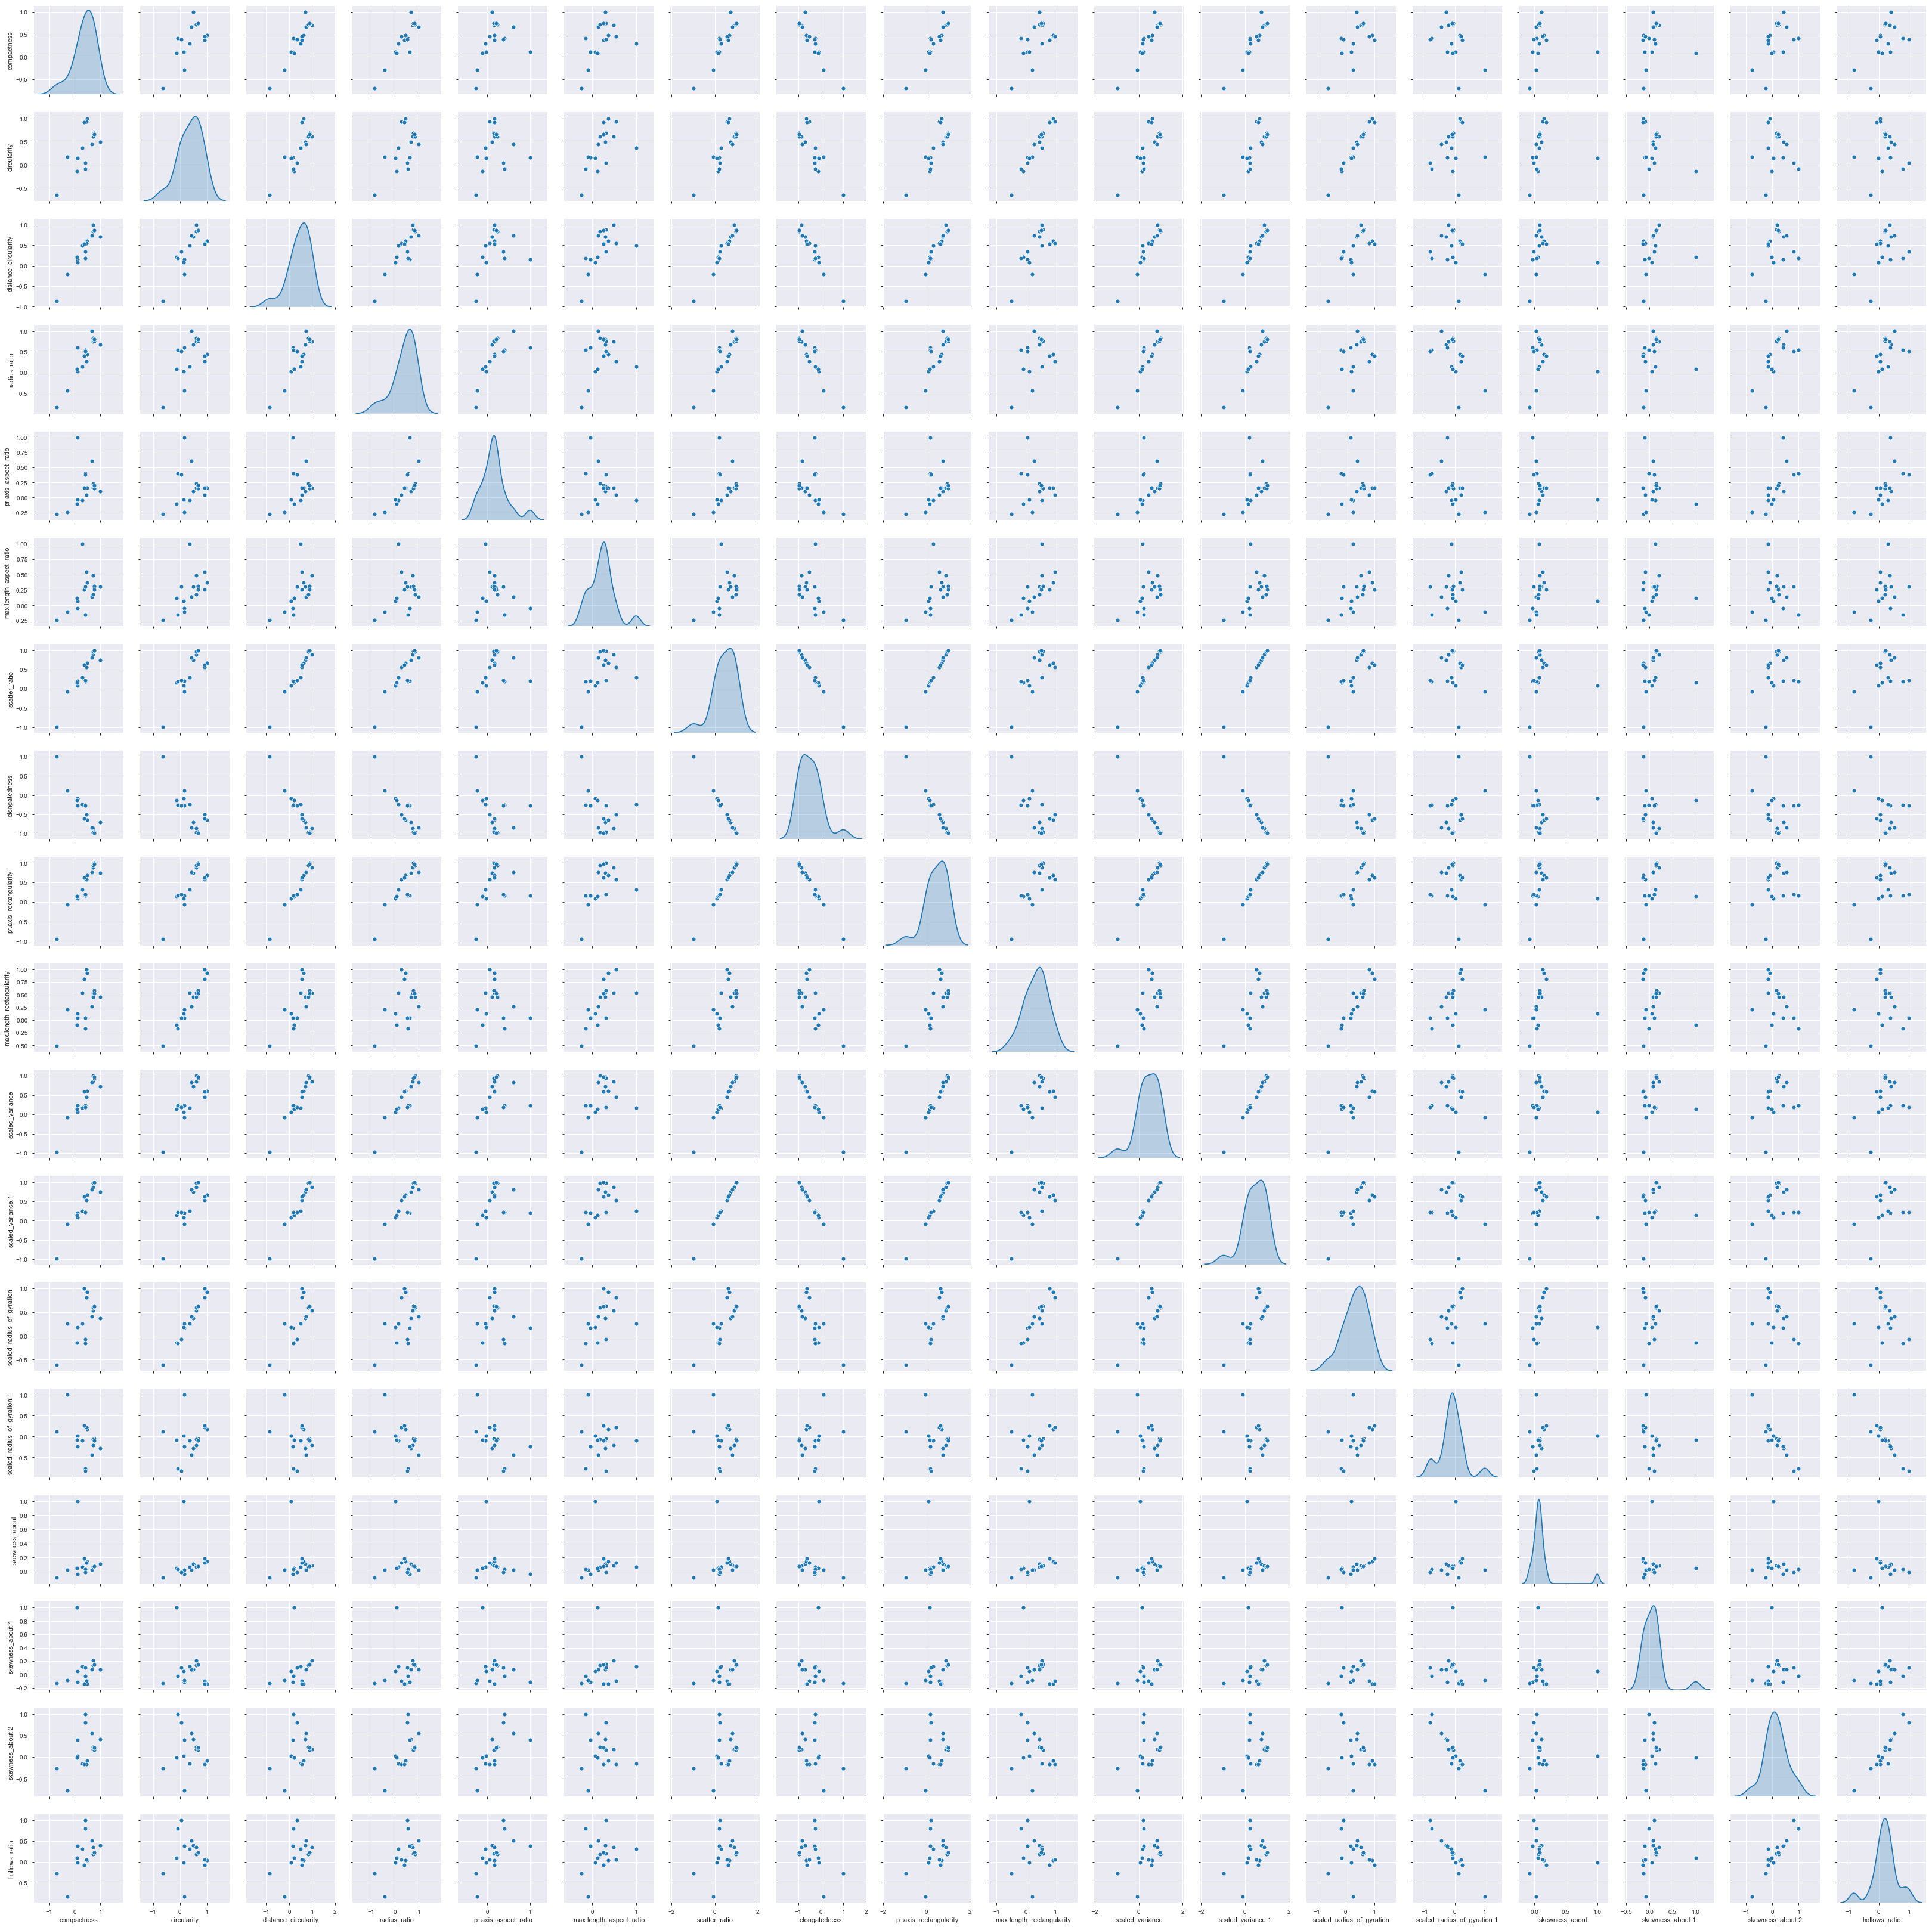

In [21]:
sns.pairplot(vecFeats_corr, diag_kind='kde' )

**Observations**

As earlier stated, quite a lot of the features are strongly correlated.

About 8 of the features shows very strong linear relationship with one another. For my preliminary analysis, these 4 variables will be dropped. These are 

1. circularity                    
2. pr.axis_rectangularity         
3. scaled_variance                
4. scaled_variance.1              
                

From the distribution plot, we may consider a minimum grouping of about 3 clusters.

In [22]:
exempt ="""
circularity                    
pr.axis_rectangularity         
scaled_variance                
scaled_variance.1 """


exempt_new = exempt.split()
print(exempt_new)


['circularity', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1']


In [23]:
vecFeats_mod = vecFeats.drop(exempt_new, axis=1)
vecFeats_mod.head() #second batCH of features

compactness  distance_circularity  radius_ratio  pr.axis_aspect_ratio  \
0           95                  83.0         178.0                  72.0   
1           91                  84.0         141.0                  57.0   
2          104                 106.0         209.0                  66.0   
3           93                  82.0         159.0                  63.0   
4           85                  70.0         205.0                 103.0   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                       10          162.0           42.0   
1                        9          149.0           45.0   
2                       10          207.0           32.0   
3                        9          144.0           46.0   
4                       52          149.0           45.0   

   max.length_rectangularity  scaled_radius_of_gyration  \
0                        159                      184.0   
1                        143                      158.0   
2                        158                      220.0   
3                        143                      127.0   
4                        144                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

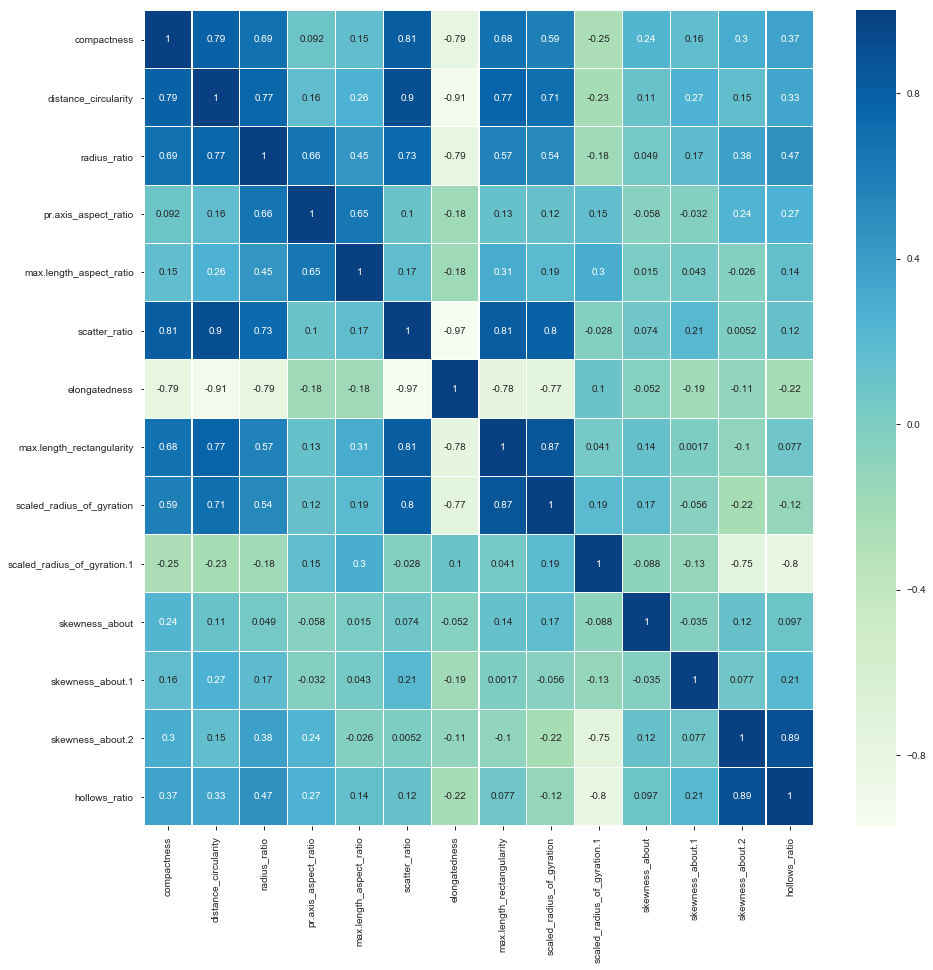

In [24]:
vecFeats_modC = vecFeats_mod.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(vecFeats_modC, annot=True, vmax=1, 
            cmap='GnBu',linecolor="white", linewidths=0.1)

In [25]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

**DATA SCALING**

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings


X_train, X_test, y_train, y_test = train_test_split(vecFeats, target, test_size=0.3, random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(vecFeats_mod, target, test_size=0.3, random_state=2)

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
X1_train = scale.fit_transform(X1_train)
X1_test = scale.fit_transform(X1_test)

**MODEL HYPER PARAMETER OPTIMIZATION USING GRIDSERCHCV**

In [30]:
from sklearn.svm import SVC

def optmod(model, X, y, paramgrid, cv):
    mod = GridSearchCV(model, paramgrid, cv=cv)
    mod.fit(X, y)
    print('Best Parameters:',mod.best_params_)
    print('Best Score:', mod.best_score_)
    
paramgrid = {'C':np.arange(0.01, 1, 0.05), 'kernel':('rbf','linear')}

svc_mod = SVC(class_weight='balanced')
optmod(svc_mod, vecFeats, target, paramgrid, cv=10)    

Best Parameters: {'C': 0.11, 'kernel': 'linear'}
Best Score: 0.958628841607565


**MODEL 1 USING ALL ATTRIBUTES AS SUPPLIED**


In [31]:
#using all variables without dropping the hgly correlated ones
mod_svc1 = SVC(class_weight='balanced', C=0.11, kernel='linear', random_state=42)
mod_svc1.fit(X_train, y_train)
mod_svc1_pred = mod_svc1.predict(X_test)

auc_mod_svc1 = accuracy_score(y_test, mod_svc1_pred)

print(classification_report(y_test, mod_svc1_pred))
print(confusion_matrix(y_test, mod_svc1_pred))

print('Accuracy_Score:')
print(accuracy_score(y_test, mod_svc1_pred))

              precision    recall  f1-score   support

         bus       0.87      0.95      0.91        78
         car       0.98      0.86      0.92       118
         van       0.89      1.00      0.94        58

   micro avg       0.92      0.92      0.92       254
   macro avg       0.91      0.94      0.92       254
weighted avg       0.93      0.92      0.92       254

[[ 74   2   2]
 [ 11 102   5]
 [  0   0  58]]
Accuracy_Score:
0.9212598425196851


In [32]:
#for modified features: vecFeats_mod

optmod(svc_mod, vecFeats_mod, target, paramgrid, cv=10) 

Best Parameters: {'C': 0.21000000000000002, 'kernel': 'linear'}
Best Score: 0.9539007092198581


**MODEL 2 USING THE COLLECTION OF ATTRIBUTES AFTER DROPPING THOSE WITH STRONG LINEAR CORRELATION**



In [33]:
mod_svc2 = SVC(class_weight='balanced', C=0.21000000000000002, kernel='linear', random_state=49)
mod_svc2.fit(X1_train, y1_train)
mod_svc2_pred = mod_svc2.predict(X1_test)

auc_mod_svc2 = accuracy_score(y1_test, mod_svc2_pred)

print(classification_report(y1_test, mod_svc2_pred))
print(confusion_matrix(y1_test, mod_svc2_pred))
print('Accuracy_Score:')
print(accuracy_score(y1_test, mod_svc2_pred))

              precision    recall  f1-score   support

         bus       0.93      0.94      0.93        68
         car       0.96      0.88      0.92       120
         van       0.88      1.00      0.94        66

   micro avg       0.93      0.93      0.93       254
   macro avg       0.92      0.94      0.93       254
weighted avg       0.93      0.93      0.93       254

[[ 64   4   0]
 [  5 106   9]
 [  0   0  66]]
Accuracy_Score:
0.9291338582677166


In [34]:
from sklearn.ensemble import RandomForestClassifier

randMod = RandomForestClassifier(class_weight='balanced')

paramgrid3 = {'n_estimators': np.arange(1, 100, 1), 'criterion':('gini', 'entropy'), 
              'max_depth':np.arange(1, 10, 1), }

optmod(randMod, vecFeats, target, paramgrid3, cv=10) 

Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 73}
Best Score: 0.9704491725768322


**MODEL 3 - RANDOM FOREST ALL ATTRIBUTES AS SUPPLIED**


In [35]:
randMod = RandomForestClassifier(class_weight='balanced', criterion='gini', 
                                 max_depth= 9, n_estimators= 73, random_state=23)
randMod.fit(X_train, y_train)
randMod_pred = randMod.predict(X_test)

auc_randMod = accuracy_score(y_test, randMod_pred)

print(classification_report(y_test, randMod_pred))
print(confusion_matrix(y_test, randMod_pred))

print('Accuracy_Score:')

print(accuracy_score(y_test, randMod_pred))


colnames = vecFeats.columns
features = randMod.feature_importances_

cols = ['Rank']

feat_imp_dict = dict(zip(colnames, features))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

              precision    recall  f1-score   support

         bus       0.99      0.96      0.97        78
         car       0.97      0.95      0.96       118
         van       0.90      0.97      0.93        58

   micro avg       0.96      0.96      0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254

[[ 75   2   1]
 [  1 112   5]
 [  0   2  56]]
Accuracy_Score:
0.9566929133858267


0
max.length_aspect_ratio      0.139598
distance_circularity         0.104753
scaled_variance.1            0.099411
scatter_ratio                0.087881
scaled_variance              0.078222
elongatedness                0.069945
max.length_rectangularity    0.066425
pr.axis_rectangularity       0.043950
scaled_radius_of_gyration.1  0.043749
pr.axis_aspect_ratio         0.039420
hollows_ratio                0.038348
radius_ratio                 0.038069
compactness                  0.033705
skewness_about.2             0.029335
skewness_about               0.024536
skewness_about.1             0.024178
circularity                  0.020793
scaled_radius_of_gyration    0.017681

**Observations**

Based on random forest, the important features required for model optimisation taking a cut-off point of 5% are 6. These are:
1. max.length_aspect_ratio
2. scaled_variance.1
3. distance_circularity
4. elongatedness
5. scatter_ratio
6. scaled_variance

**PRINCIPAL COMPONENT ANALYSIS**

In [36]:
from sklearn.decomposition import PCA
from scipy.stats import zscore

new_vecfeats = vecFeats.apply(zscore)
pca = PCA(n_components=12, svd_solver='full')
red_feats = pca.fit_transform(new_vecfeats)
print(pca.components_)
print(pca.explained_variance_ratio_)

cum_var = np.cumsum(pca.explained_variance_ratio_)*100
print('cummulative variance explained', cum_var)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

**OBSERVATIONS**

1. The first 7 components of the PCA accounts for about 96.13% of the data variability
2. This result is consistent with the number of features described as being important by the Random Forest model

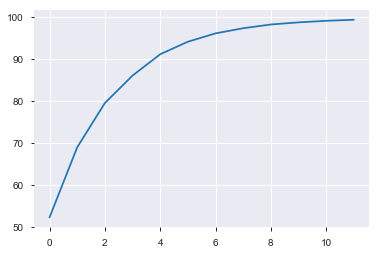

In [37]:

plt.plot(cum_var)


In [38]:
plt.plot(pca.explained_variance_)

In [39]:
mod_vecfeats = vecFeats.apply(zscore)
pca1 = PCA(n_components=7, svd_solver='full')
red_mod = pca1.fit_transform(new_vecfeats)
print(pca1.components_)
print(pca1.explained_variance_ratio_)

cum_var1 = np.cumsum(pca1.explained_variance_ratio_)*100
print('cummulative variance explained', cum_var1)

[[ 2.75259459e-01  2.93392341e-01  3.04556452e-01  2.67593206e-01
   8.04938998e-02  9.72198560e-02  3.16872006e-01 -3.14042361e-01
   3.13953009e-01  2.82790417e-01  3.09310530e-01  3.14149034e-01
   2.72002525e-01 -2.09179819e-02  4.13316728e-02  5.83331566e-02
   3.01560495e-02  7.40813666e-02]
 [-1.27010856e-01  1.26217125e-01 -7.26862818e-02 -1.89635192e-01
  -1.22158741e-01  1.07277825e-02  4.80473095e-02  1.27991503e-02
   6.00351423e-02  1.16182501e-01  6.17536908e-02  5.32757796e-02
   2.09279660e-01  4.88541866e-01 -5.49212020e-02 -1.24152855e-01
  -5.40947666e-01 -5.40279812e-01]
 [-1.19874162e-01 -2.51835016e-02 -5.60058748e-02  2.75066087e-01
   6.42046458e-01  5.91799912e-01 -9.76530949e-02  5.74645766e-02
  -1.09509169e-01 -1.69994013e-02  5.64656174e-02 -1.08711428e-01
  -3.13685232e-02  2.86211092e-01 -1.15693651e-01 -7.54878378e-02
   8.68929277e-03  3.95143108e-02]
 [ 7.83109159e-02  1.87525528e-01 -7.07959698e-02 -4.22567515e-02
   3.28577853e-02  3.13199694e-02 -9.

In [40]:
pca_cols = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6', 'PCA7']

pca_comp = pd.DataFrame(red_mod, columns=pca_cols)
pca_comp.head()

PCA1      PCA2       PCA3      PCA4      PCA5      PCA6      PCA7
0  0.332393 -0.218638   1.001286  0.177328  0.079106 -0.754814 -0.902187
1 -1.593741 -0.420549  -0.369264  0.233484  0.693397 -0.519073  0.376234
2  3.767535  0.195041   0.088237  1.203129  0.730907  0.705377 -0.032642
3 -1.740753 -2.829579   0.109176  0.377522 -0.363483 -0.487863  0.468613
4  0.555239  4.757557  11.703588  0.145068  3.257651 -0.211649  2.671191

**OBSERVATIONS**

In the next section, I used the PCA as attributes to develop a classification model using SVM. 
First an optimization of hyper parameters was done before the model was fitted to the new data set.

In [41]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(pca_comp, target, test_size=0.3, random_state=3)

pca_svm = SVC(class_weight='balanced')

paramgridpca = {'C':np.arange(0.01, 1, 0.05), 'kernel':('rbf','linear')}

optmod(pca_svm, pca_comp, target, paramgridpca, cv=10) 

Best Parameters: {'C': 0.76, 'kernel': 'rbf'}
Best Score: 0.9137115839243499


**MODEL 4 - SVM MODEL USING PCA**

In [42]:
#Using the optimised parameters and PCA components to generate a new SVM classification model

pca_svm = SVC(class_weight='balanced', C=0.76, kernel='rbf')
pca_svm.fit(Xp_train, yp_train)

pca_svm_pred = pca_svm.predict(Xp_test)

auc_pca_svm = accuracy_score(yp_test, pca_svm_pred)

print(classification_report(yp_test, pca_svm_pred))
print(confusion_matrix(yp_test, pca_svm_pred))

print('Accuracy_Score:')

print(accuracy_score(yp_test, pca_svm_pred))

              precision    recall  f1-score   support

         bus       0.93      0.97      0.95        71
         car       0.97      0.85      0.90       123
         van       0.78      0.95      0.86        60

   micro avg       0.91      0.91      0.91       254
   macro avg       0.90      0.92      0.90       254
weighted avg       0.92      0.91      0.91       254

[[ 69   1   1]
 [  4 104  15]
 [  1   2  57]]
Accuracy_Score:
0.905511811023622


**OBSERVATIONS**

The SVM model using PCA components resulted in an accuracy of 91%. When compared with the results from the ensemble model and the SVM model using all the attributes, there is a difference of between 1 an 6 %. However, there is a gain in compute time for the PCA attributes compared to the original attributes 

In [43]:
import xgboost as xgb
from xgboost import XGBRFClassifier
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder()

new_targ = enc.fit_transform(target)

Xg_train, Xg_test, yg_train, yg_test = train_test_split(vecFeats, target, test_size=0.3, random_state=23)

xgb_mod = XGBRFClassifier()


paramgrid_xgb = {'max_depth':np.arange(1,5, 1), 'learning_rate': np.arange(0.1, 1.0, 0.05), 
                 'n_estimators': np.arange(1, 50, 1), 'booster': ('gbtree', 'gblinear', 'dart'), 
                'importance_type': ("gain", "weight", "cover", "total_gain" ,"total_cover")}

optmod(xgb_mod, vecFeats, target, paramgrid_xgb, cv=5)


Best Parameters: {'booster': 'gbtree', 'importance_type': 'gain', 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 15}
Best Score: 0.925531914893617


In [71]:
xgb_mod = XGBRFClassifier(importance_type='gain', learning_rate=0.01, max_depth=12, n_estimators=90, random_state=42)

xgb_mod.fit(Xg_train, yg_train)
xgb_pred = xgb_mod.predict(Xg_test)

print(classification_report(yg_test, xgb_pred))
print(confusion_matrix(yg_test, xgb_pred))

auc_xgb_mod = accuracy_score(yg_test, xgb_pred)

print('Accuracy_Score:')
print(accuracy_score(yg_test, xgb_pred))


xgb_colnames = vecFeats.columns
xgb_feats = xgb_mod.feature_importances_

feat_imp_dict1 = dict(zip(xgb_colnames, xgb_feats))
table_xgb = pd.DataFrame.from_dict(feat_imp_dict1, orient='index')
table_xgb

              precision    recall  f1-score   support

         bus       0.89      0.98      0.94        60
         car       0.95      0.90      0.93       136
         van       0.88      0.90      0.89        58

   micro avg       0.92      0.92      0.92       254
   macro avg       0.91      0.93      0.92       254
weighted avg       0.92      0.92      0.92       254

[[ 59   0   1]
 [  7 123   6]
 [  0   6  52]]
Accuracy_Score:
0.9212598425196851


0
compactness                  0.016676
circularity                  0.022955
distance_circularity         0.027180
radius_ratio                 0.015191
pr.axis_aspect_ratio         0.030136
max.length_aspect_ratio      0.172383
scatter_ratio                0.048035
elongatedness                0.113956
pr.axis_rectangularity       0.084598
max.length_rectangularity    0.058993
scaled_variance              0.054668
scaled_variance.1            0.170352
scaled_radius_of_gyration    0.018343
scaled_radius_of_gyration.1  0.046462
skewness_about               0.019839
skewness_about.1             0.018496
skewness_about.2             0.032800
hollows_ratio                0.048936

In [66]:
results = {'pca_svm':auc_pca_svm, 'randMod':auc_randMod, 'mod_svc1':auc_mod_svc1, 'mod_svc2':auc_mod_svc2,
          'xgb_mod':auc_xgb_mod}
cols_final = ['MODELS', 'AUC_SCORE']

FINAL_RESULTS = pd.DataFrame(list(results.items()), columns=cols_final)

FINAL_RESULTS

MODELS  AUC_SCORE
0   pca_svm   0.905512
1   randMod   0.956693
2  mod_svc1   0.921260
3  mod_svc2   0.929134
4   xgb_mod   0.921260

**CONCLUSIONS**

From the summarised table above, the random forest model using all the attributes resulted in an accuracy of 95.2%. Also, the 3 classes in the data have precision, recall and F1 scores above 91%.

The classification models using a filtered down number of attributes based on dropping features with high multicolinearity produced a higher accuracy using SVM.

The SVM model using PCA resulted in the least value of accuracy howbeit, it ran for a shorter duration compared to others.

